In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') #忽视警告

plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

import jieba
import jieba.analyse
from wordcloud import WordCloud


# 读取数据

In [ ]:
df = pd.read_csv("douban_queen_reviews.csv")

# 分词

In [3]:
#加载外部分词字典
jieba.load_userdict("userdict.txt")

# 使用jieba进行中文分词
def chinese_segmentation(text):
    words = jieba.cut(text, cut_all=False, HMM=True)
    return " ".join(words)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.822 seconds.
Prefix dict has been built successfully.


In [4]:
# 先处理缺失值，将缺失值替换为一个空字符串或其他合适的值
df['content'].fillna('', inplace=True)
# 对DataFrame的'content'列应用中文分词
df['content_segmented'] = df['content'].apply(chinese_segmentation)

In [5]:
df['content_segmented']

0      前 几天 有 一句 十分 歹毒 的 骂人 话 冲 上 了 热 搜 ， 出处 是 正在 播出 ...
1      一不小心 一口气 追剧 到   12   集 。 不说 一些 浮夸 的 剧情 ， 剧情 来自...
2      今晚 看 《 新闻 女王 》 第   15   集 ， 很 有意思 。 文慧心 回到 家 ，...
3      “ 找个 男人 嫁 了 吧 ” 比 以前   TVB   宫斗剧 扇 耳光 更 “ 狠 ” ...
4      在 正式 看 这部 剧 之前 ， 光听 名字 就 觉得 像 个 烂剧 ， “ 女王 ” 两个...
                             ...                        
178    很久没 见 一部 剧 值得 给 长评 了 ， 这部 大约 是 值得 的 。 只是 等 了 这...
179    文   \   榴花 照图   \   源自 网络 ， 侵删 致歉 ------------...
180    《 新闻 女王 》 是 用 宫斗剧 的 打法 拍 现代 职场 剧 。 第十集 ， 文慧心 成...
181    1 .   新闻 主播 英语 「 Anchor 」 \n 原 解作 固定 船身 的 锚 \n...
182    今年 我 觉得 最 魔幻现实主义 的 事 发生 了 ， 当内 娱在 播放 《 以爱为 营 》...
Name: content_segmented, Length: 183, dtype: object

# 同义词替换

In [6]:
# 加载同义词文件
synonym_file_path = 'synonym.txt'
synonym_dict = {}

# 读取同义词文件，创建同义词典，将同义词映射到主词
with open(synonym_file_path, 'r', encoding='utf-8') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) > 1:
            main_word = parts[0]
            synonyms = parts[1:]
            for synonym in synonyms:
                synonym_dict[synonym] = main_word

# 替换同义词的函数（针对已分词的情况）
def replace_synonyms(words):
    # 使用同义词典替换同义词为主词
    replaced_words = [synonym_dict.get(word, word) for word in words]

    # 将分词结果拼接成字符串
    return " ".join(replaced_words)

# 对 'content_segmented' 列应用替换同义词的函数
df['content_segmented'] = df['content_segmented'].apply(lambda x: replace_synonyms(x.split()))

# 显示替换同义词后的 DataFrame
print(df['content_segmented'])


0      前 几天 有 一句 十分 歹毒 的 骂人 话 冲 上 了 热 搜 ， 出处 是 正在 播出 ...
1      一不小心 一口气 追剧 到 12 集 。 不说 一些 浮夸 的 剧情 ， 剧情 来自 生活 ...
2      今晚 看 《 新闻 女王 》 第 15 集 ， 很 有意思 。 文慧心 回到 家 ， 发现 ...
3      “ 找个 男人 嫁 了 吧 ” 比 以前 TVB 宫斗剧 扇 耳光 更 “ 狠 ” 啊 ， ...
4      在 正式 看 这部 剧 之前 ， 光听 名字 就 觉得 像 个 烂剧 ， “ 女王 ” 两个...
                             ...                        
178    很久没 见 一部 剧 值得 给 长评 了 ， 这部 大约 是 值得 的 。 只是 等 了 这...
179    文 \ 榴花 照图 \ 源自 网络 ， 侵删 致歉 --------------------...
180    《 新闻 女王 》 是 用 宫斗剧 的 打法 拍 现代 职场 剧 。 第十集 ， 文慧心 成...
181    1 . 新闻 主播 英语 「 Anchor 」 原 解作 固定 船身 的 锚 引申 稳住 新...
182    今年 我 觉得 最 魔幻现实主义 的 事 发生 了 ， 当内 娱在 播放 《 以爱为 营 》...
Name: content_segmented, Length: 183, dtype: object


# 哪些影视作品被quote到

In [7]:
import re
import pandas as pd

# 提取包含在《》中的字符串的函数
def extract_titles(text):
    # 使用正则表达式提取《》中的字符串
    matches = re.findall(r'《(.*?)》', text)
    return matches

# 创建新的 DataFrame df_movie
df_movie = pd.DataFrame(columns=['Movie Title', 'Original Title'])


    Movie Title                  Original Title
2       花儿与少年 5  TVB 示范最狠骂人，和真正的「大女主 · 职场 · 爽剧」
3         花儿与少年  TVB 示范最狠骂人，和真正的「大女主 · 职场 · 爽剧」
7          延禧攻略  TVB 示范最狠骂人，和真正的「大女主 · 职场 · 爽剧」
8          延禧攻略  TVB 示范最狠骂人，和真正的「大女主 · 职场 · 爽剧」
9          鉴证实录  TVB 示范最狠骂人，和真正的「大女主 · 职场 · 爽剧」
..          ...                             ...
299        以爱为营               有人骂你野心勃勃，有人爱你灵魂有火
300        以爱为营               有人骂你野心勃勃，有人爱你灵魂有火
301        以爱为营               有人骂你野心勃勃，有人爱你灵魂有火
302        以爱为营               有人骂你野心勃勃，有人爱你灵魂有火
310       我本是高山               有人骂你野心勃勃，有人爱你灵魂有火

[125 rows x 2 columns]


In [42]:
df_movie.to_excel("df_movie.xlsx")

In [9]:
# 使用 drop_duplicates 方法去除同一 Original Title 下的重复 Movie Title
df_unique_titles = df_movie[['Movie Title', 'Original Title']].drop_duplicates()

# 统计 Movie Title 的频率
title_frequency = df_unique_titles['Movie Title'].value_counts()

# 打印结果或进行其他操作
title_frequency.head(20)

Movie Title
金枝欲孽       7
早间新闻       3
延禧攻略       3
陀枪师姐       2
鉴证实录       2
使徒行者       2
刑事侦缉档案     2
我们与恶的距离    2
以爱为营       2
问心         2
迷雾         2
宫心计        2
辅佐官        1
棒球大联盟      1
栋笃神探       1
继承之战       1
花儿与少年 5    1
飞虎         1
铁探         1
无所畏惧       1
Name: count, dtype: int64

# 词频分析

In [10]:
# 将分好词的文本拆分成词语列表
df['content_segmented_list'] = df['content_segmented'].str.split()

# 使用explode将词语列表展开为单独的行
df_tokens = df.explode('content_segmented_list')

# 重新设置索引
df_tokens = df_tokens.reset_index(drop=True)

# 打印结果
df_tokens.content_segmented_list

0          前
1         几天
2          有
3         一句
4         十分
          ..
101044    现实
101045     的
101046     了
101047     吗
101048     ？
Name: content_segmented_list, Length: 101049, dtype: object

In [11]:
# 词频统计
df_tokens["content_segmented_list"].value_counts()

content_segmented_list
，      8983
的      5540
。      3182
是      1687
了      1229
       ... 
高贵        1
看中        1
拓展        1
磨炼        1
几十个       1
Name: count, Length: 12825, dtype: int64

In [10]:
#导出数据
df_tokens["content_segmented_list"].value_counts().to_excel("reviews_freq.xlsx")

# 提取出分好词的字符串格式的文本

In [11]:
# 对所有'content_segmented'文本进行拼接
all_content_text = " ".join(df['content_segmented'])

In [17]:
all_content_text

'前'

# 词云分析

- **默认模式**

In [12]:
# 创建词云，并排除停用词
def generate_wordcloud(text):
    # 从外部文件读取停用词列表
    jieba.analyse.set_stop_words("stopwords.txt")
    
    # 使用 jieba.analyse.extract_tags 提取关键词
    keywords = jieba.analyse.extract_tags(text, topK=100, withWeight=True, allowPOS=('n', 'nr', 'ns'))#allowPOS=('n', 'nr', 'ns')：表示仅考虑名词（'n'）、人名（'nr'）、地名（'ns'）等词性的词语作为关键词。这是通过词性标注来筛选关键词的一种方式。

    # 构建关键词和权重的字典
    keywords_dict = {word: weight for word, weight in keywords}

    # 创建词云
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        max_words=100, 
        collocations=False, 
        font_path= r'C:\Windows\Fonts\simhei.ttf',  # 使用支持中文的字体（黑体）
    ).generate_from_frequencies(keywords_dict)
    
    # 显示词云图像
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# 生成并显示词云
generate_wordcloud(all_content_text)

- **带背景模式**

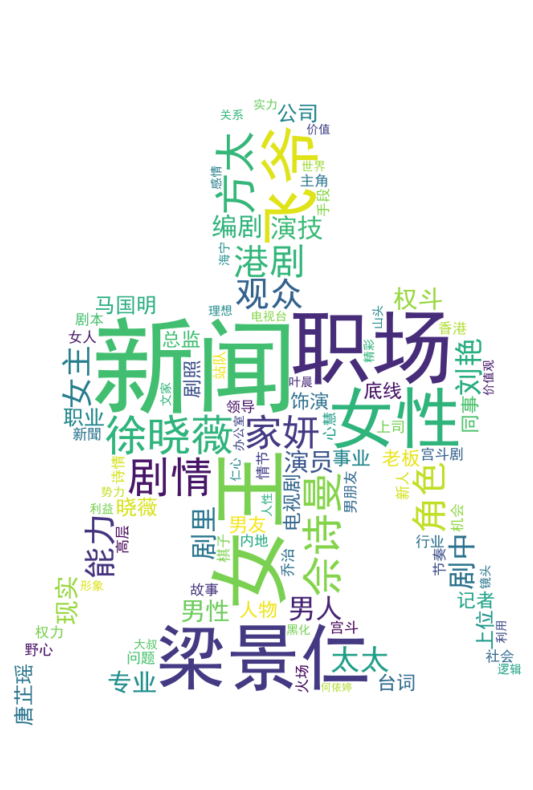

In [18]:
import jieba.analyse
from wordcloud import WordCloud
from imageio import imread
import matplotlib.pyplot as plt

# 从外部文件读取停用词列表
jieba.analyse.set_stop_words("stopwords.txt")

def generate_wordcloud(text):
    # Using jieba.analyse.extract_tags to extract keywords
    keywords = jieba.analyse.extract_tags(text, topK=100, withWeight=True, allowPOS=('n', 'nr', 'ns'))

    # Building a dictionary of keywords and weights
    keywords_dict = {word: weight for word, weight in keywords}

    # Creating the word cloud
    wordcloud = WordCloud(
        mask=imread("新闻女王_抠图.jpg"),
        background_color="white",
        max_words=100,
        collocations=False,
        font_path=r'C:\Windows\Fonts\simhei.ttf',
    ).generate_from_frequencies(keywords_dict)

    # Display the word cloud image
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(all_content_text)


## 来看看情感分析效果如何

In [42]:
df.groupby("ratings").sentiment.mean()

ratings
1    0.590736
2    0.682305
3    0.755353
4    0.844787
5    0.821564
Name: sentiment, dtype: float64